In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df=pd.read_csv("Final_dataset.csv")

In [7]:
df.head(5)

,Pregnancies,Plasma Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [8]:
df.tail(5)

,Pregnancies,Plasma Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Diabetic
17763,2,75,64,24,55,29.7,0.370,33,0
17764,8,179,72,42,130,32.7,0.719,36,1
17765,6,85,78,0,0,31.2,0.382,42,0
17766,0,129,110,46,130,67.1,0.319,26,1
17767,2,81,72,15,76,30.1,0.547,25,0


In [10]:
df.shape

(17768, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17768 entries, 0 to 17767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnancies        17768 non-null  int64  
 1   Plasma Glucose     17768 non-null  int64  
 2   Blood Pressure     17768 non-null  int64  
 3   Skin Thickness     17768 non-null  int64  
 4   Insulin            17768 non-null  int64  
 5   BMI                17768 non-null  float64
 6   Diabetes Pedigree  17768 non-null  float64
 7   Age                17768 non-null  int64  
 8   Diabetic           17768 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.2 MB


In [12]:
df.isnull().sum()

Pregnancies          0
Plasma Glucose       0
Blood Pressure       0
Skin Thickness       0
Insulin              0
BMI                  0
Diabetes Pedigree    0
Age                  0
Diabetic             0
dtype: int64

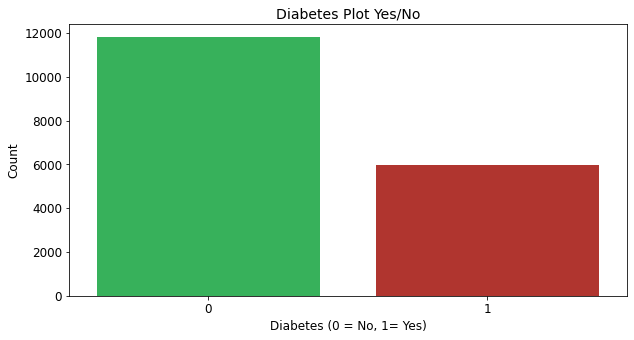

In [14]:
plt.figure(figsize=(10,5))
plt.title('Diabetes Plot Yes/No', fontsize=14)
sns.countplot(x="Diabetic", data=df, palette=('#23C552','#C52219'))
plt.xlabel("Diabetes (0 = No, 1= Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

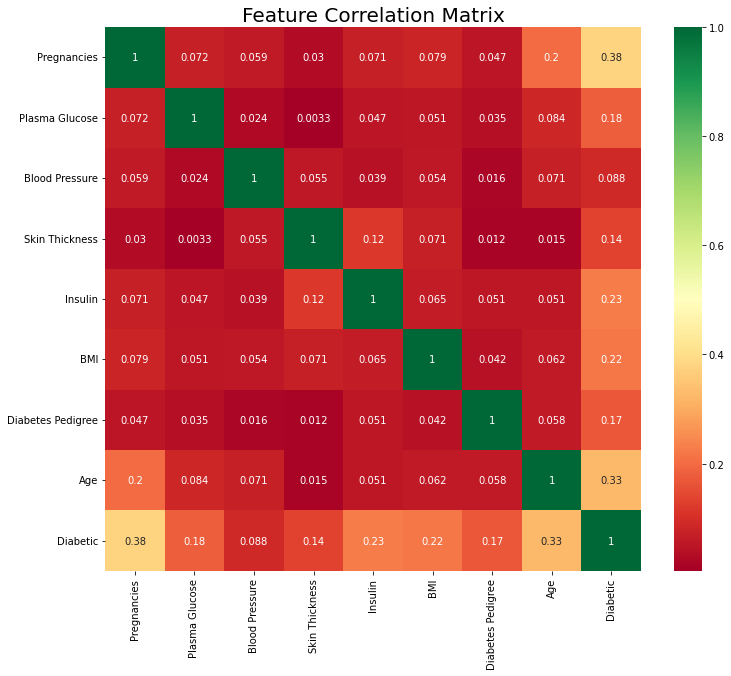

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title("Feature Correlation Matrix",fontsize=20)
plt.show()

In [16]:
df.describe()

,Pregnancies,Plasma Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree,Age,Diabetic
count,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000,17768.000000
mean,3.305268,109.920362,70.895655,27.569338,128.859523,31.607440,0.410219,30.604232,0.334984
std,3.385764,32.348240,17.183449,15.080551,131.722658,9.518938,0.371202,12.090103,0.471998
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,0.000000,86.000000,59.000000,14.000000,34.000000,21.589648,0.146095,22.000000,0.000000
50%,2.000000,107.000000,72.000000,29.000000,78.000000,31.900000,0.236038,25.000000,0.000000
75%,6.000000,132.000000,84.000000,40.000000,188.000000,38.900337,0.618056,37.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


In [17]:
df['Diabetic'].value_counts()

0    11816
1     5952
Name: Diabetic, dtype: int64

In [18]:
#Split the data into x and y

from sklearn.model_selection import train_test_split
x = df.drop(['Diabetic'],axis=1)
y = df['Diabetic']

In [19]:
#Use standard scaler to scale the data

from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scaled= sc.fit_transform(x)

In [20]:
#split the data into train and test

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=0)

In [21]:
x_train.shape, y_train.shape

((12437, 8), (12437,))

In [22]:
x_test.shape, y_test.shape

((5331, 8), (5331,))

In [47]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(criterion = "gini",
                                       min_samples_leaf = 1,
                                       min_samples_split = 10,
                                       n_estimators=20, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)
random_forest.fit(x_train, y_train)
y_pred = random_forest.predict(x_test)

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
confmat1 = confusion_matrix(y_pred, y_test)
confmat1

array([[3390,  195],
       [ 138, 1608]], dtype=int64)

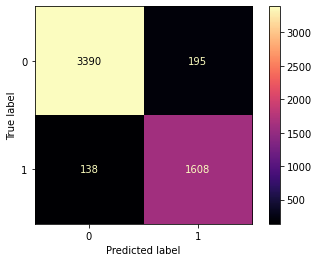

In [49]:
from sklearn import metrics
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=metrics.confusion_matrix(y_pred,y_test,labels=random_forest.classes_),
                              display_labels=random_forest.classes_)
cm.plot(cmap="magma")

In [50]:
accuracy_score(y_pred, y_test)

0.9375351716375915